In [62]:
#Import the required libraries
import pandas as pd
import os.path as osp

#Build the path for the data file
data_path = osp.join(
    osp.curdir,'Data','MMA860 Assignment 2 Data.xlsx')

#Use the read_excel function to pull data from the 'Sales Data' sheet
data = pd.read_excel(
    data_path,sheet_name='Missing')
data.head()

,Obs,Y,X1,X2,X3,X4,X5
0,1,2774,78.0,42.0,55.0,48.0,66.0
1,2,3250,43.0,28.0,26.0,22.0,56.0
2,3,3228,11.0,21.0,30.0,49.0,60.0
3,4,2861,27.0,49.0,53.0,43.0,61.0
4,5,4232,92.0,64.0,45.0,80.0,21.0


In [27]:
data.dtypes

Obs      int64
Y        int64
X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
dtype: object

In [28]:
data.describe()

,Obs,Y,X1,X2,X3,X4,X5
count,100.000000,100.000000,99.000000,95.000000,99.000000,96.000000,98.000000
mean,50.500000,3757.450000,46.202020,49.515789,61.000000,58.125000,46.306122
std,29.011492,1116.462355,29.753401,15.753327,23.007984,20.957225,22.977088
min,1.000000,815.000000,1.000000,18.000000,21.000000,13.000000,6.000000
25%,25.750000,3109.250000,20.500000,38.500000,39.500000,43.000000,28.000000
50%,50.500000,3588.000000,46.000000,49.000000,59.000000,58.500000,46.500000
75%,75.250000,4653.000000,71.000000,60.500000,81.500000,76.250000,66.000000
max,100.000000,6747.000000,98.000000,87.000000,100.000000,99.000000,87.000000


In [29]:
missing_info = list(data.columns[data.isnull().any()])


In [30]:
missing_info

['X1', 'X2', 'X3', 'X4', 'X5']

In [31]:
for col in missing_info:
    num_missing = data[data[col].isnull() == True].shape[0]
    print('number missing for column {}: {}'.format(col,
                                                    num_missing))

number missing for column X1: 1
number missing for column X2: 5
number missing for column X3: 1
number missing for column X4: 4
number missing for column X5: 2


In [32]:
for col in missing_info:
    percent_missing = data[data[col].isnull() == True].shape[0] / data.shape[0]
    print('percent missing for column {}: {}'.format(
        col, percent_missing))

percent missing for column X1: 0.01
percent missing for column X2: 0.05
percent missing for column X3: 0.01
percent missing for column X4: 0.04
percent missing for column X5: 0.02


In [36]:
data.dropna().shape

(87, 7)

In [37]:
dropped_data=data.dropna()


In [38]:
dropped_data

,Obs,Y,X1,X2,X3,X4,X5
0,1,2774,78.0,42.0,55.0,48.0,66.0
1,2,3250,43.0,28.0,26.0,22.0,56.0
2,3,3228,11.0,21.0,30.0,49.0,60.0
3,4,2861,27.0,49.0,53.0,43.0,61.0
4,5,4232,92.0,64.0,45.0,80.0,21.0
...,...,...,...,...,...,...,...
95,96,3828,90.0,51.0,99.0,31.0,41.0
96,97,5539,3.0,45.0,87.0,70.0,14.0
97,98,4154,46.0,40.0,39.0,50.0,77.0
98,99,3199,22.0,75.0,28.0,75.0,9.0


In [40]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

'''
In order to input data from a pandas dataframe and into a sci-kit function,
we need to convert the dataframe series into NumPy Arrays. This can be done
with the values function.
'''
train_X = dropped_data[['X1','X2','X3','X4','X5']].values
train_y = dropped_data['Y'].values

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''
reg = LinearRegression().fit(train_X, train_y)

In [42]:
print("R-Squared:", reg.score(train_X, train_y))

R-Squared: 0.23620043945336733


In [44]:
'''
Computing intercept is trivial. The 'slope' coefficients are outputted as a
tuple (consider this analogous to an array or list). We must index the tuple
to get the numeric values. The values appear in the tuple in an order that 
corresponds to the position of the independent variable to which they are the
slope of. For example, X_train has Ad_Budget values first then Distance values 
which results in the order presented below.
'''

print("B_0 =",reg.intercept_)

#X1 Coefficient
print("B_1 =",reg.coef_[0])

#X2 Coefficient
print("B_2 =",reg.coef_[1])

#X2 Coefficient
print("B_3 =",reg.coef_[2])

#X2 Coefficient
print("B_4 =",reg.coef_[3])

#X2 Coefficient
print("B_5 =",reg.coef_[4])

B_0 = 1101.8572262547345
B_1 = 6.498891558549711
B_2 = 13.828060306377521
B_3 = 14.783054333562065
B_4 = 11.07636874597723
B_5 = 2.219514218468708


In [45]:
import numpy as np

#The prediction function takes a Numpy array as an argument
reg.predict(np.array([36,35,89,67,46]).reshape(1,-1))[0]

3979.705628802796

In [ ]:
#the Y value for above is 3255 vs. 3980 that we got using regression model prediction

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
Fitting a model involves passing two arguments to ols: the general formula as
a string and the data set used. Remember that the formula's attributes must
match the column names in the dataframe. Then the fit() function is run and
then summary() can be applied to that model.
'''
model = ols('Y ~ X1 + X2 + X3 + X4 + X5',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.010
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           0.000476
Time:                        02:49:32   Log-Likelihood:                -723.02
No. Observations:                  87   AIC:                             1458.
Df Residuals:                      81   BIC:                             1473.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1101.8572    567.951      1.940      0.0

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
Fitting a model involves passing two arguments to ols: the general formula as
a string and the data set used. Remember that the formula's attributes must
match the column names in the dataframe. Then the fit() function is run and
then summary() can be applied to that model.
'''
model = ols('Y ~ X1 + X2 + X3 + X4 + X5',dropped_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.010
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           0.000476
Time:                        02:29:15   Log-Likelihood:                -723.02
No. Observations:                  87   AIC:                             1458.
Df Residuals:                      81   BIC:                             1473.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1101.8572    567.951      1.940      0.0

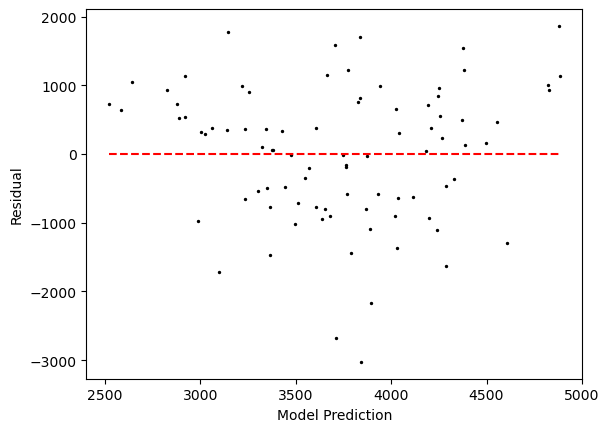

In [50]:
#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

In [51]:
print('Mean of Residuals:',residuals.mean())

Mean of Residuals: -4.3906640775244813e-13


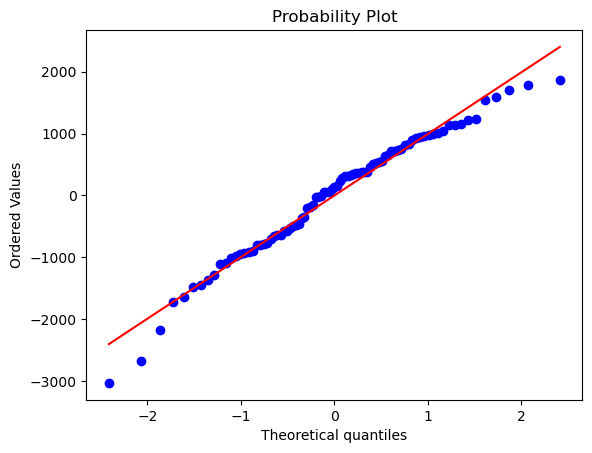

In [52]:
import scipy.stats as stats

'''
Boilerplate code for creating a Normal Q-Q plot. The first two lines declare 
a figure and a subplot. This is an alternate way to output plots which allows 
for more than one plot per output.
'''
fig = plt.figure()
ax = fig.add_subplot(111)

'''
Scipy.Stats has a built-in function for generating this type of plot. This 
function takes three arguments: the measurement being checked (residuals), 
the distribution we are checking against (normal in this case), and the plot 
to plot it to.
'''
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

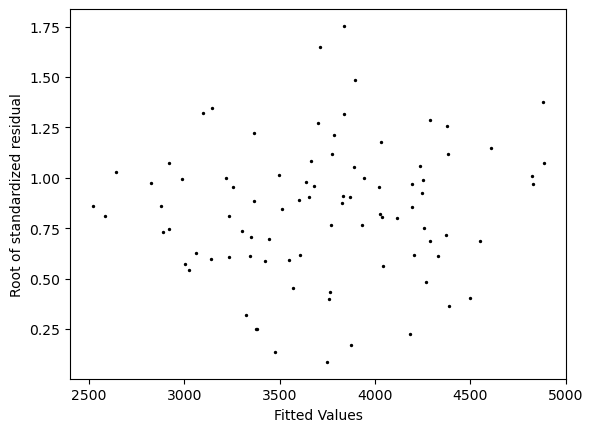

In [53]:
from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

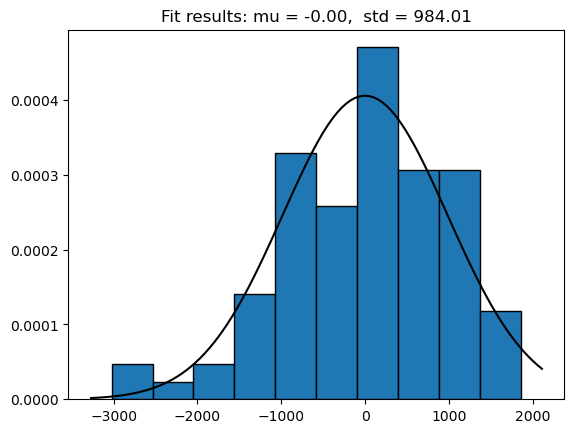

In [60]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=10, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

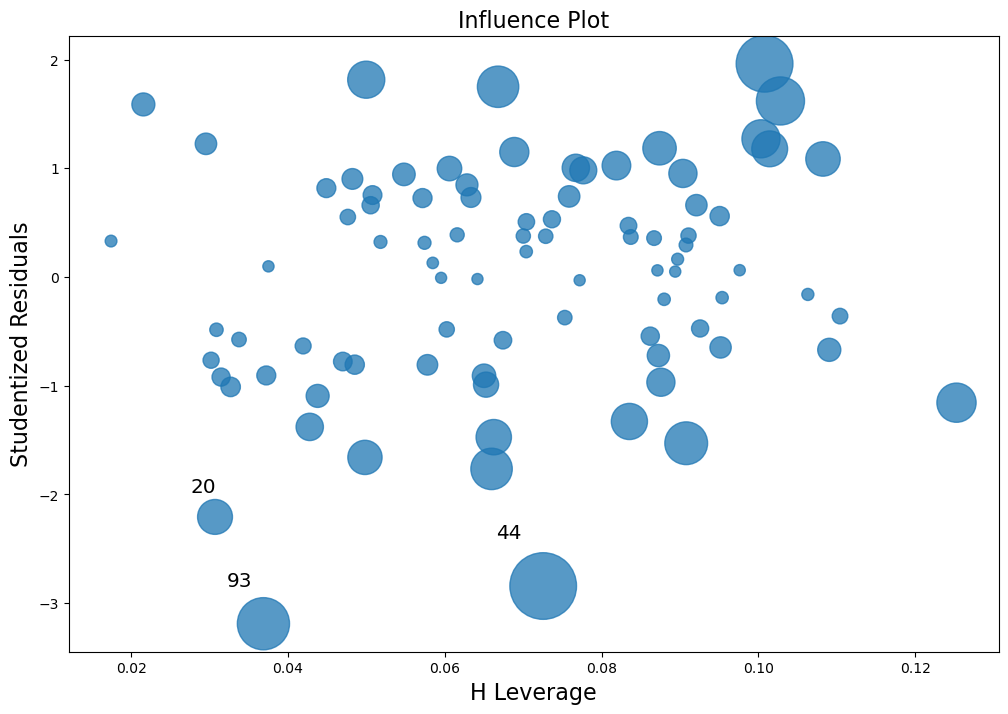

In [59]:
#In a similar fashion to how the QQ plot was built, this plot can be generated.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()